In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('C:/Users/sun/Desktop/Univ/4_1/MediaProject/Project2/kill_match_stats_final_4.csv')

In [3]:
kill=data.copy()

In [4]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11640855 entries, 0 to 11640854
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   killed_by          object 
 1   killer_name        object 
 2   killer_placement   float64
 3   killer_position_x  float64
 4   killer_position_y  float64
 5   map                object 
 6   match_id           object 
 7   time               int64  
 8   victim_name        object 
 9   victim_placement   float64
 10  victim_position_x  float64
 11  victim_position_y  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.0+ GB


In [5]:
kill.head()

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,M249,0932313woaini,7.0,529007.7,440035.5,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1209,GODusopp,11.0,526111.8,432951.8
1,Kar98k,arunrunrun,6.0,440414.8,285918.1,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1096,TheOnly_0ne,13.0,438853.4,280981.6
2,Down and Out,Rabbit812,6.0,439923.2,282419.0,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1096,NOAIM1,13.0,437034.8,282477.7
3,Down and Out,0932313woaini,7.0,530312.4,440969.0,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1209,liweiliwei,11.0,528304.4,439696.8
4,SCAR-L,sa11y1126,3.0,466609.2,409546.3,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1793,PKBskg,5.0,462901.5,403350.5


In [6]:
x_diff=kill['killer_position_x']-kill['victim_position_x']
y_diff=kill['killer_position_y']-kill['victim_position_y']
sq_diffs=x_diff**2+y_diff**2
dists=np.sqrt(sq_diffs)
kill['kill_distance']=dists
log_distance=np.log10(1+dists)
kill['kill_log_distance']=log_distance

In [7]:
kill.head()

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y,kill_distance,kill_log_distance
0,M249,0932313woaini,7.0,529007.7,440035.5,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1209,GODusopp,11.0,526111.8,432951.8,7652.780050,3.883876
1,Kar98k,arunrunrun,6.0,440414.8,285918.1,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1096,TheOnly_0ne,13.0,438853.4,280981.6,5177.547895,3.714208
2,Down and Out,Rabbit812,6.0,439923.2,282419.0,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1096,NOAIM1,13.0,437034.8,282477.7,2888.996409,3.460897
3,Down and Out,0932313woaini,7.0,530312.4,440969.0,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1209,liweiliwei,11.0,528304.4,439696.8,2377.089994,3.376228
4,SCAR-L,sa11y1126,3.0,466609.2,409546.3,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1793,PKBskg,5.0,462901.5,403350.5,7220.455452,3.858625


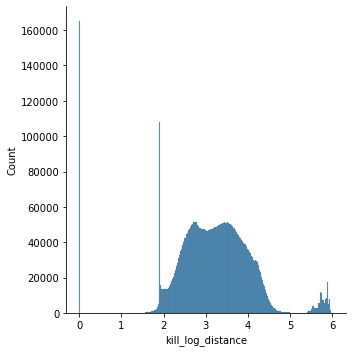

In [8]:
sns.displot(kill['kill_log_distance'].dropna())

In [9]:
kill[kill.kill_log_distance>=5].groupby(['killer_position_x','killer_position_y']).count()

,,killed_by,killer_name,killer_placement,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y,kill_distance,kill_log_distance
killer_position_x,killer_position_y,,,,,,,,,,,,
0.00,0.00,52656,52656,52656,52151,52656,52656,52656,49848,52656,52656,52656,52656
19697.38,134036.20,1,1,1,1,1,1,1,1,1,1,1,1
24478.36,136817.60,1,1,1,1,1,1,1,1,1,1,1,1
26753.27,132335.50,1,1,1,1,1,1,1,1,1,1,1,1
27194.21,130026.40,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797586.10,19505.01,1,1,1,1,1,1,1,1,1,1,1,1
797605.80,18264.39,1,1,1,1,1,1,1,1,1,1,1,1
798613.50,15982.52,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
kill[kill.kill_log_distance>=5].groupby(['victim_position_x','victim_position_y']).count()

,,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,kill_distance,kill_log_distance
victim_position_x,victim_position_y,,,,,,,,,,,,
0.00,0.00,241929,241929,241929,241929,241929,238691,241929,241929,241929,241928,241929,241929
19038.86,135131.60,1,1,1,1,1,1,1,1,1,1,1,1
35351.39,154613.20,1,1,1,1,1,1,1,1,1,1,1,1
39140.21,261192.00,1,1,1,1,1,1,1,1,1,1,1,1
40925.15,326235.90,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794200.60,28361.35,1,1,1,1,1,1,1,1,1,1,1,1
795781.80,23005.99,1,1,1,1,1,1,1,1,1,1,1,1
795899.00,28301.95,1,1,1,1,1,1,1,1,1,1,1,1


In [11]:
#kill_log_distance 값이 5가 넘는 값들은 killer좌표가(0,0)이거나 victim 좌표가 (0,0)임을 알 수 있음.
#핵을 쓴 것이 의심되므로 killer좌표가 (0,0)이거나 victim 좌표가 (0,0)인 데이터는 삭제한다.
idx_zero=kill[((kill['killer_position_x']==0)&(kill['killer_position_y']==0))|((kill['victim_position_x']==0)&(kill['victim_position_y']==0))].index

kill_deleted=kill.drop(idx_zero)

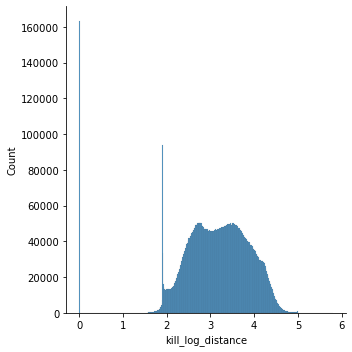

In [12]:
sns.displot(kill_deleted['kill_log_distance'].dropna())

In [13]:
kill_deleted['killed_by'].value_counts()

Down and Out                       1966041
M416                               1312784
SCAR-L                             1072556
M16A4                              1056728
AKM                                 975437
UMP9                                627599
S1897                               481239
Mini 14                             349836
Bluezone                            332320
Kar98k                              292879
S686                                276898
SKS                                 264206
S12K                                253516
Micro UZI                           225727
Punch                               224312
Grenade                             201564
Tommy Gun                           143611
P1911                               125042
P92                                 123697
Falling                             122248
Hit by Car                           99510
Vector                               65813
Uaz                                  37059
Groza      

In [14]:
kill_deleted.insert(1,'kill_by_type','not_killed')

In [15]:
kill_deleted.head()

,killed_by,kill_by_type,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y,kill_distance,kill_log_distance
0,M249,not_killed,0932313woaini,7.0,529007.7,440035.5,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1209,GODusopp,11.0,526111.8,432951.8,7652.780050,3.883876
1,Kar98k,not_killed,arunrunrun,6.0,440414.8,285918.1,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1096,TheOnly_0ne,13.0,438853.4,280981.6,5177.547895,3.714208
2,Down and Out,not_killed,Rabbit812,6.0,439923.2,282419.0,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1096,NOAIM1,13.0,437034.8,282477.7,2888.996409,3.460897
3,Down and Out,not_killed,0932313woaini,7.0,530312.4,440969.0,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1209,liweiliwei,11.0,528304.4,439696.8,2377.089994,3.376228
4,SCAR-L,not_killed,sa11y1126,3.0,466609.2,409546.3,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1793,PKBskg,5.0,462901.5,403350.5,7220.455452,3.858625


In [16]:
#킬 원인 모르겠는 거 삭제
idx_dk=kill_deleted[(kill_deleted['killed_by']=='death.Buff_FireDOT_C')|(kill_deleted['killed_by']=='death.WeapSawnoff_C')].index
kill_deleted=kill_deleted.drop(idx_dk)

kill_deleted['killed_by'].value_counts()

Down and Out                       1966041
M416                               1312784
SCAR-L                             1072556
M16A4                              1056728
AKM                                 975437
UMP9                                627599
S1897                               481239
Mini 14                             349836
Bluezone                            332320
Kar98k                              292879
S686                                276898
SKS                                 264206
S12K                                253516
Micro UZI                           225727
Punch                               224312
Grenade                             201564
Tommy Gun                           143611
P1911                               125042
P92                                 123697
Falling                             122248
Hit by Car                           99510
Vector                               65813
Uaz                                  37059
Groza      

In [17]:
weapons=['M416','M16A4','SCAR-L','AKM', 'UMP9', 'S1897', 'Mini 14','Kar98k','S686','SKS','S12K','Micro UZI','Grenade','Tommy Gun','P1911','P92','Vector','Groza','M24','DP-28','R1895','VSS','AWM','M249','Win94','Crossbow','Mk14','P18C','AUG','death.ProjMolotov_DamageField_C','R45','Machete','Crowbar','Sickle','death.ProjMolotov_C','Pan']

vehicles=['Hit by Car','Uaz','Dacia','Motorbike (SideCar)','Motorbike','Pickup Truck','Buggy','Boat','Aquarail','death.PG117_A_01_C']

In [18]:
kill_deleted.loc[kill_deleted.killed_by=='Punch','kill_by_type']='Punch'

In [19]:
#무기로 인해 죽은 것 kill_by_type을 weapon으로 지정
for i in range(len(weapons)):
    kill_deleted.loc[kill_deleted.killed_by==weapons[i],'kill_by_type']='weapon'


In [21]:
#탈 것으로 인해 죽은 것 kill_by_type을 vehicle로 지정
for i in range(len(vehicles)):
    kill_deleted.loc[kill_deleted.killed_by==vehicles[i],'kill_by_type']='vehicle'

In [25]:
#맵 별로 분류
kill_MIRAMAR=kill_deleted[kill_deleted['map']=='MIRAMAR']
kill_ERANGEL=kill_deleted[kill_deleted['map']=='ERANGEL']

In [26]:
kill_MIRAMAR

,killed_by,kill_by_type,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y,kill_distance,kill_log_distance
0,M249,weapon,0932313woaini,7.0,529007.7,440035.5,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1209,GODusopp,11.0,526111.8,432951.8,7652.780050,3.883876
1,Kar98k,weapon,arunrunrun,6.0,440414.8,285918.1,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1096,TheOnly_0ne,13.0,438853.4,280981.6,5177.547895,3.714208
2,Down and Out,not_killed,Rabbit812,6.0,439923.2,282419.0,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1096,NOAIM1,13.0,437034.8,282477.7,2888.996409,3.460897
3,Down and Out,not_killed,0932313woaini,7.0,530312.4,440969.0,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1209,liweiliwei,11.0,528304.4,439696.8,2377.089994,3.376228
4,SCAR-L,weapon,sa11y1126,3.0,466609.2,409546.3,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1793,PKBskg,5.0,462901.5,403350.5,7220.455452,3.858625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11639926,Down and Out,not_killed,NaN,NaN,NaN,NaN,MIRAMAR,2U4GBNA0Ymm4XFTT0VP6nurXUaTAUNU6P9g6CzcuKI7zeS...,215,China-MC512,24.0,477394.5,545534.0,NaN,NaN
11639927,Kar98k,weapon,Faction_leader,1.0,642692.2,460112.1,MIRAMAR,2U4GBNA0Ymm4XFTT0VP6nurXUaTAUNU6P9g6CzcuKI7zeS...,150,yuihgyurig,27.0,642534.1,459491.8,640.131002,2.806947
11639928,M16A4,weapon,MASTERJIII,20.0,251129.8,525846.9,MIRAMAR,2U4GBNA0Ymm4XFTT0VP6nurXUaTAUNU6P9g6CzcuKI7zeS...,158,kkim11117,10.0,249987.6,527552.4,2052.644901,3.312525
11639929,SCAR-L,weapon,Yannyowns,5.0,262267.1,521568.5,MIRAMAR,2U4GBNA0Ymm4XFTT0VP6nurXUaTAUNU6P9g6CzcuKI7zeS...,894,xing950524,10.0,262576.1,521113.2,550.253660,2.741351


In [29]:
data_kill_MIRAMAR=pd.DataFrame(kill_MIRAMAR)
data_kill_MIRAMAR.to_csv('C:/Users/sun/Desktop/Univ/4_1/MediaProject/Project2/data_Kill_MIRAMAR.csv',header=True, index=False)

In [30]:
data_kill_ERANGEL=pd.DataFrame(kill_ERANGEL)
data_kill_ERANGEL.to_csv('C:/Users/sun/Desktop/Univ/4_1/MediaProject/Project2/data_Kill_ERANGEL.csv',header=True, index=False)

In [40]:
data_kill_TOTAL=pd.DataFrame(kill_deleted)
data_kill_TOTAL.to_csv('C:/Users/sun/Desktop/Univ/4_1/MediaProject/Project2/data_Kill_TOTAL.csv',header=True, index=False)

In [34]:
kill_by_weapon_in_MIRAMAR=kill_MIRAMAR[kill_MIRAMAR['kill_by_type']=='weapon']

In [39]:
kill_by_weapon_in_MIRAMAR.groupby('killer_name').count().head(10)

,killed_by,kill_by_type,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y,kill_distance,kill_log_distance
killer_name,,,,,,,,,,,,,,
#unknown,18995,18995,18995,18995,18995,18995,18995,18995,18995,18725,18995,18995,18995,18995
0---noon,5,5,5,5,5,5,5,5,5,5,5,5,5,5
0-0-0-9,4,4,4,4,4,4,4,4,4,4,4,4,4,4
0-0-Bram,9,9,9,9,9,9,9,9,9,9,9,9,9,9
0-000000,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0-0HeartBreaker,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0-0Maki,4,4,4,4,4,4,4,4,4,4,4,4,4,4
0-0TAT,3,3,3,3,3,3,3,3,3,3,3,3,3,3
0-0XXOO,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
def kill_by_type_test(df):
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    for i in range(len(label)):
        ratio=df.
        axs[i].pie()
        axs[i].set_title()